In [1]:
import pandas as pd
import pickle 

# GET PARAMETERS
import os 
import sys
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.train_model_on_k_fold_validation import load_configuration

Training and Hyper-parameter tuning with Ray is not possible


## Load 'args' from a trial id

In [4]:
trial_id = 'subway_in_subway_out_ASTGCN_MSELoss_2025_04_21_20_06_76371'
# 'subway_in_subway_out_ASTGCN_MSELoss_2025_04_21_20_06_76371 ' ASTGCN + Stack Channel + 500 epochs
# 'subway_in_subway_out_ASTGCN_MSELoss_2025_04_21_02_26_61597' ASTGCN + Stack Channel + 100 epochs
# 'subway_in_subway_out_STGCN_MSELoss_2025_02_20_22_43_85017' NEW RIM ARCHITECTURE : Stack Channel / No spatial Attn /
# 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271' NEW RIM ARCHITECTURE : Stack Channel / No spatial Attn / No Temporal Attn
# "subway_in_netmob_POIs_per_station_STGCN_MSELoss_2025_02_18_03_38_83510" # NEW RIM ARCHITECTURE
# 'subway_in_subway_out_STGCN_MSELoss_2025_02_14_16_03_71730' # NEW RIM ARCHITECTURE


# "subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_02_01_12_25_68609"   #  Bug ????

# "subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_06_02_04_17963"
# 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2025_01_07_05_04_80480'
# "subway_in_STGCN_MSELoss_2025_01_06_08_00_94523"
args,_ = load_configuration(trial_id,load_config=True)

print('Best args: ')
print(args)


>>>> Load best CONFIG
Best args: 
Namespace(model_name='ASTGCN', dataset_names=['subway_in', 'subway_out'], dataset_for_coverage=['subway_in', 'netmob_POIs'], device=device(type='cuda'), optimizer='adamw', single_station=False, loss_function_type='MSE', epsilon_clustering=0.05, freq='15min', minmaxnorm=True, standardize=False, learnable_adj_matrix=False, learnable_adj_top_k=8, learnable_adj_embd_dim=8, contextual_positions={'subway_out': 2}, quick_vision=False, netmob_transfer_mode='DL', evaluate_complete_ds=True, train_valid_test_split_method='similar_length_method', set_spatial_units=None, hp_tuning_on_first_fold=True, keep_best_weights=False, num_workers=0, persistent_workers=False, pin_memory=True, prefetch_factor=2, drop_last=False, mixed_precision=False, non_blocking=True, torch_compile=False, backend='inductor', prefetch_all=False, NetMob_selected_apps=['Google_Maps', 'Deezer', 'Instagram'], NetMob_transfer_mode=['DL'], NetMob_selected_tags=['iris'], NetMob_expanded='', NetMob_

In [8]:
df_hp_tuning =pd.read_csv(f'save/HyperparameterTuning/{trial_id}.csv')
model_args = pickle.load(open(f'save/HyperparameterTuning/model_args.pkl','rb'))
metric = '_metric/Loss_model'
# Load common args through all tuning trials:
args = model_args['model'][trial_id]['args']

# Rename columns, remove useless ones: 
columns = [c for c in df_hp_tuning.columns if ('_metric/' in c) or ('config/' in c) or ('training_iteration' in c)]
columns_rename = {c:c.split('/')[-1] for c in columns}
df_best_configs = df_hp_tuning[columns].sort_values(metric).rename(columns = columns_rename)
df_best_configs
print('Best configs:')
display(df_best_configs.iloc[:20])

Best configs:


,training_iteration,Loss_model,lr,weight_decay,dropout,threshold,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor
168,160,0.003868,0.00244,0.028665,0.374129,0.75,NaN,NaN,NaN,NaN
5,80,0.003872,0.00431,0.079335,0.572126,0.00,True,39.0,0.991994,0.113443
140,80,0.003900,0.00565,0.057663,0.100147,0.00,True,49.0,0.991861,0.459275
150,80,0.003912,0.00170,0.081562,0.533086,0.70,True,39.0,0.998396,0.183854
197,500,0.003915,0.00046,0.063621,0.504296,0.65,True,21.0,0.991270,0.236098
99,80,0.003919,0.00021,0.062987,0.460995,0.65,True,29.0,0.996988,0.390125
187,80,0.003929,0.00093,0.044430,0.255617,0.65,True,42.0,0.997127,0.809702
28,80,0.003955,0.00035,0.090345,0.236415,0.70,True,18.0,0.988679,0.804258
143,80,0.003984,0.00055,0.047163,0.735278,0.65,True,47.0,0.997137,0.296404
11,500,0.003991,0.00152,0.005894,0.469019,0.65,True,19.0,0.989729,0.306883


In [ ]:
df = df_best_configs[~df_best_configs.scheduler.isna()]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['lr'], df['weight_decay'], df['dropout'], 
                     c=df['Loss_model'], cmap='YlOrRd_r', s=50)

ax.set_xlabel('lr')
ax.set_ylabel('weight_decay')
ax.set_zlabel('dropout')
ax.set_title("Loss function of weight-decay, dropout and lr")
ax.view_init(30, 60, 0)
fig.colorbar(scatter, ax=ax, label='Loss_model')
plt.show()

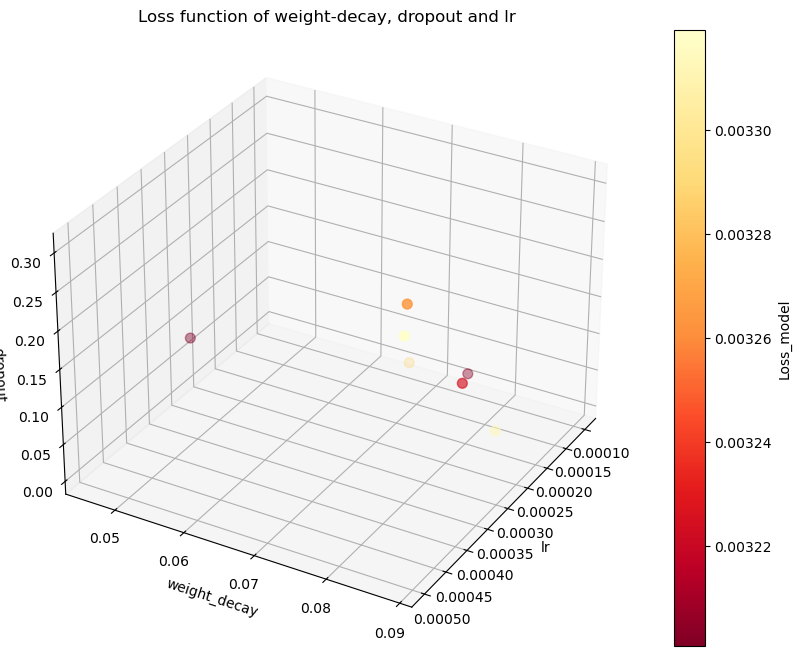

In [33]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plotting_loss_function_of_w_d_lr(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['lr'], df['weight_decay'], df['dropout'], 
                        c=df['Loss_model'], cmap='YlOrRd_r', s=50)

    ax.set_xlabel('lr')
    ax.set_ylabel('weight_decay')
    ax.set_zlabel('dropout')
    ax.set_title("Loss function of weight-decay, dropout and lr")
    ax.view_init(30, 30, 0)
    fig.colorbar(scatter, ax=ax, label='Loss_model')
    plt.show()


max_loss = 0.00332
max_lr =1 #0.003
df_filtered = df_best_configs[(df_best_configs['Loss_model'] < max_loss) &
                              (df_best_configs['lr'] < max_lr)]

df = df_filtered[~df_filtered.scheduler.isna()]
plotting_loss_function_of_w_d_lr(df)


#df = df_filtered[df_filtered.scheduler.isna()]
#plotting_loss_function_of_w_d_lr(df)


#plotting_loss_function_of_w_d_lr(df_filtered)

In [4]:
df_hp_tuning =pd.read_csv(f'save/HyperparameterTuning/{trial_id}.csv')
model_args = pickle.load(open(f'save/HyperparameterTuning/model_args.pkl','rb'))
metric = '_metric/Loss_model'
# Load common args through all tuning trials:
args = model_args['model'][trial_id]['args']

# Rename columns, remove useless ones: 
columns = [c for c in df_hp_tuning.columns if ('_metric/' in c) or ('config/' in c)]
columns_rename = {c:c.split('/')[-1] for c in columns}
df_best_configs = df_hp_tuning[columns].sort_values(metric).rename(columns = columns_rename)
df_best_configs
print('Best configs:')
display(df_best_configs.iloc[:20])

Best configs:


,Loss_model,lr,weight_decay,dropout,temporal_h_dim,spatial_h_dim,output_h_dim,TGE_num_layers,TGE_num_heads,TGE_FC_hdim,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor
43,0.003555,0.00145,0.093438,0.017829,128,32,64,3,1,8,True,29.0,0.988059,0.600637
180,0.003558,0.00290,0.056935,0.205239,8,128,32,8,2,16,True,16.0,0.994082,0.494039
415,0.003686,0.00310,0.076135,0.209686,128,32,16,4,1,64,True,6.0,0.989726,0.609100
479,0.003715,0.00260,0.015236,0.153810,64,16,256,8,8,16,True,21.0,0.986840,0.273233
72,0.003723,0.00265,0.056675,0.087503,64,128,64,1,1,8,True,13.0,0.987510,0.355194
488,0.003726,0.00030,0.035155,0.013960,32,32,256,1,1,256,NaN,NaN,NaN,NaN
234,0.003740,0.00060,0.082800,0.119636,32,256,256,2,8,16,True,14.0,0.991411,0.928782
262,0.003776,0.00125,0.061103,0.065937,16,64,32,3,8,64,True,13.0,0.989121,0.202832
247,0.003781,0.00245,0.054753,0.018427,32,128,8,4,1,64,NaN,NaN,NaN,NaN
57,0.003792,0.00015,0.068777,0.034193,128,8,256,8,2,256,True,6.0,0.996067,0.284229


## Load best configs from a trial id:

In [3]:
df_hp_tuning =pd.read_csv(f'save/HyperparameterTuning/{trial_id}.csv')
model_args = pickle.load(open(f'save/HyperparameterTuning/model_args.pkl','rb'))
metric = '_metric/Loss_model'
# Load common args through all tuning trials:
args = model_args['model'][trial_id]['args']

# Rename columns, remove useless ones: 
columns = [c for c in df_hp_tuning.columns if ('_metric/' in c) or ('config/' in c)]
columns_rename = {c:c.split('/')[-1] for c in columns}
df_best_configs = df_hp_tuning[columns].sort_values(metric).rename(columns = columns_rename)
df_best_configs
print('Best configs:')
display(df_best_configs.iloc[:20])

Best configs:


,Loss_model,lr,weight_decay,dropout,temporal_h_dim,spatial_h_dim,output_h_dim,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor,concatenation_early,concatenation_late,num_heads,grn_out_dim
351,0.005105,0.00065,0.007052,0.278061,256,256,8,True,25.0,0.991593,0.752912,True,False,2,64
226,0.005124,0.00115,0.065237,0.159976,16,8,8,NaN,NaN,NaN,NaN,True,True,4,32
414,0.005195,0.00055,0.024583,0.134271,32,256,16,NaN,NaN,NaN,NaN,True,True,4,16
316,0.005217,0.00110,0.022065,0.100491,256,64,32,True,28.0,0.995704,0.542937,True,True,1,16
353,0.005256,0.00400,0.072955,0.068490,32,8,8,NaN,NaN,NaN,NaN,True,False,3,24
358,0.005258,0.00260,0.017781,0.522119,16,8,256,NaN,NaN,NaN,NaN,True,False,1,8
255,0.005270,0.00055,0.065677,0.287299,256,256,128,NaN,NaN,NaN,NaN,True,False,2,8
272,0.005285,0.00485,0.015913,0.078816,64,64,256,True,2.0,0.998806,0.508260,True,False,2,32
286,0.005343,0.00070,0.033701,0.385530,256,64,128,True,7.0,0.990168,0.132749,True,True,6,48
341,0.005344,0.00390,0.037983,0.313570,128,16,32,NaN,NaN,NaN,NaN,True,True,3,24


## Load `the` best config, with no rename: 

In [8]:
# Get best config :
best_model = df_hp_tuning.sort_values(metric).iloc[0]
print('raw config of best model: ')
display(best_model)

raw config of best model: 


trial_id                                                                                       b9f67_00351
time_this_iter_s                                                                                  4.243078
done                                                                                                  True
training_iteration                                                                                     100
date                                                                                   2025-01-07_01-20-56
timestamp                                                                                       1736209256
time_total_s                                                                                    442.195914
pid                                                                                                 144430
hostname                                                                                 ticil2.ifsttar.fr
node_ip                              